In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
happy_2015 = pd.read_csv('2015.csv')
happy_2019 = pd.read_csv('world-happiness-report-2019.csv')

In [3]:
happy_2015 = happy_2015[['Country', 'Region']]

In [4]:
happy_2019 = pd.merge(happy_2015, 
                      happy_2019, left_on = 'Country', right_on = 'Country (region)').drop('Country (region)', axis =1)

In [5]:
# happy_2019.to_csv('happy_2019.csv')

In [6]:
happy_2019.head()

,Country,Region,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Switzerland,Western Europe,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
1,Iceland,Western Europe,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
2,Denmark,Western Europe,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
3,Norway,Western Europe,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
4,Canada,North America,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0


In [7]:
happy_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 12 columns):
Country                    150 non-null object
Region                     150 non-null object
Ladder                     150 non-null int64
SD of Ladder               150 non-null int64
Positive affect            149 non-null float64
Negative affect            149 non-null float64
Social support             149 non-null float64
Freedom                    149 non-null float64
Corruption                 142 non-null float64
Generosity                 149 non-null float64
Log of GDP
per capita      148 non-null float64
Healthy life
expectancy    145 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 15.2+ KB


## Relationship Chart

Now lets us see the relationship between two features with the scatter chart. We could try the Ladder with the Positive affect feature.

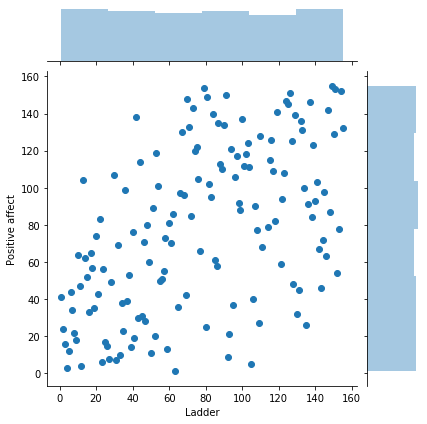

In [8]:
sns.jointplot(data = happy_2019, kind = 'scatter', x ='Ladder', y = 'Positive affect')

If we add the third dimension as the size to the plot, we could create a bubble plot. Lets try it

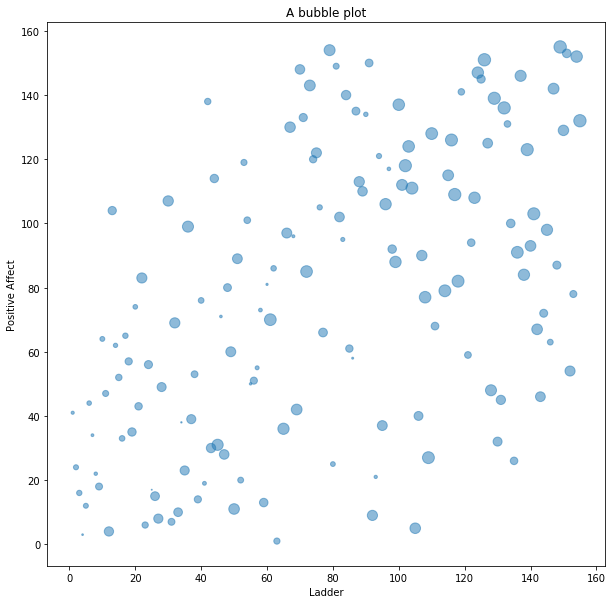

In [9]:
plt.figure(figsize = (10,10))
plt.scatter(x = happy_2019['Ladder'], y = happy_2019['Positive affect'],  
            s=happy_2019['Negative affect'], alpha = 0.5)
 
plt.xlabel("Ladder")
plt.ylabel("Positive Affect")
plt.title("A bubble plot")
 
plt.show()

We could even add the fourth dimension to the bubble plot by adding color spectrum to the bubble plot using value from another features. 

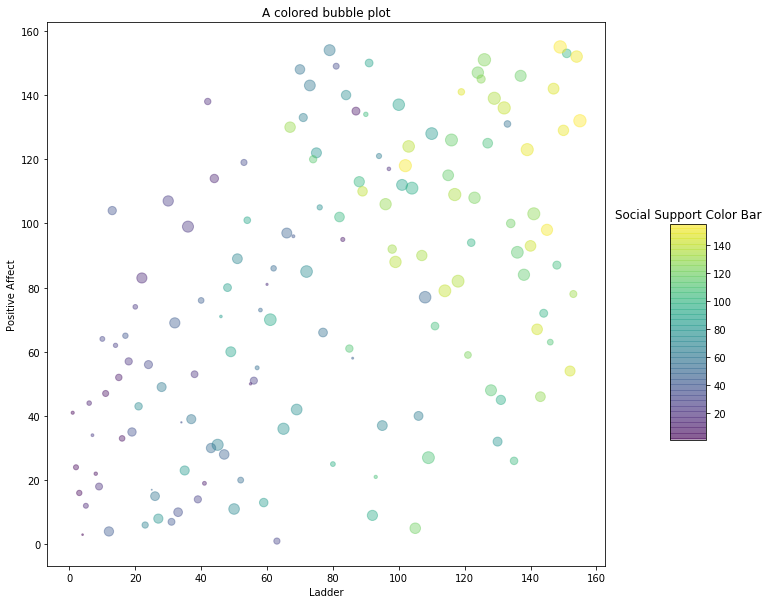

In [10]:
fig = plt.figure(figsize = (10,10))


plt.scatter(x = happy_2019['Ladder'], y = happy_2019['Positive affect'],  
            s=happy_2019['Negative affect'], alpha = 0.4, c = happy_2019['Social support'])

plt.xlabel("Ladder")
plt.ylabel("Positive Affect")
plt.title("A colored bubble plot")

# Adding colorbar
ax_col = fig.add_axes([0.99, 0.3, 0.05, 0.3])
ax_col.set_title('Social Support Color Bar')
plt.colorbar(cax = ax_col)

plt.show()           

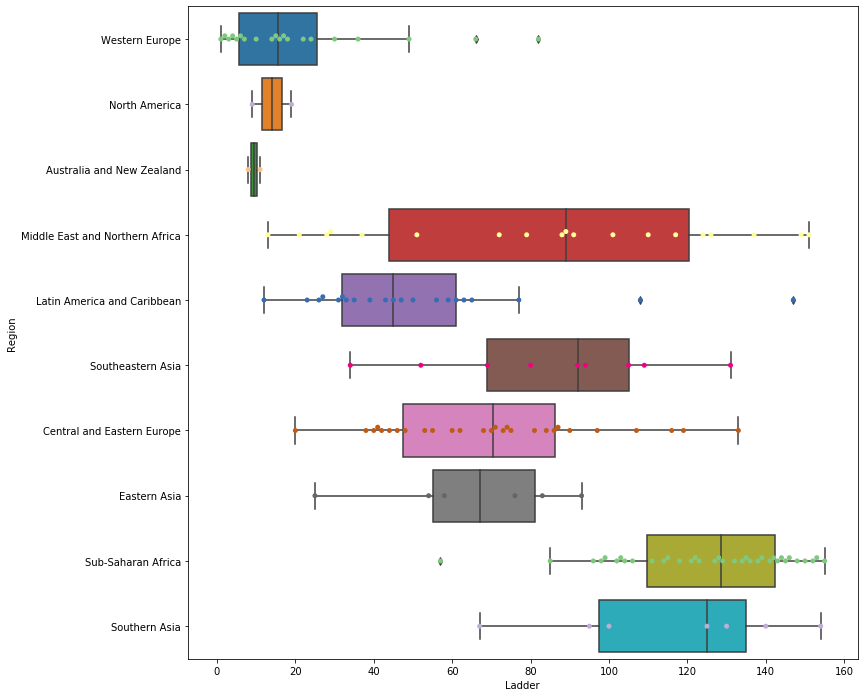

In [11]:
plt.figure(figsize=(12,12))

sns.boxplot(data=happy_2019, x='Ladder', y='Region')
sns.swarmplot(data=happy_2019, x='Ladder', y='Region', palette = 'Accent')

## Latihan - Pandas dan Visualization

1. What features that seems to be consistently affecting the ladder score? Why?
2. Is there a relationship between the region and the ladder score?
3. Can you find any relationship between numerical features other than the ladder score and the SD ladder score? why?

Lets try to explore the data. First, we try to see if any of the numerical features affecting the leader score or not. Lets use the simples data by using the correlation method and the relationship chart 

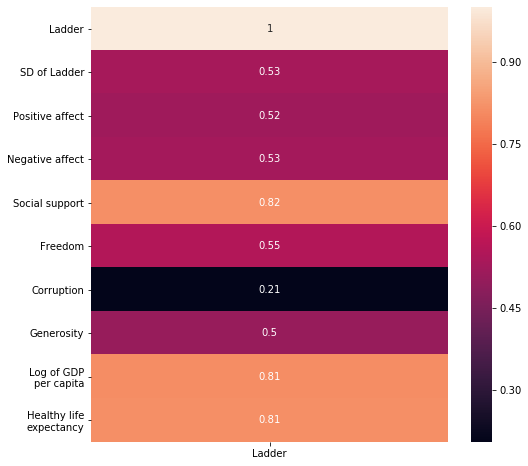

In [12]:
plt.figure(figsize = (8,8))
sns.heatmap(happy_2019.corr('spearman')[['Ladder']], annot = True)

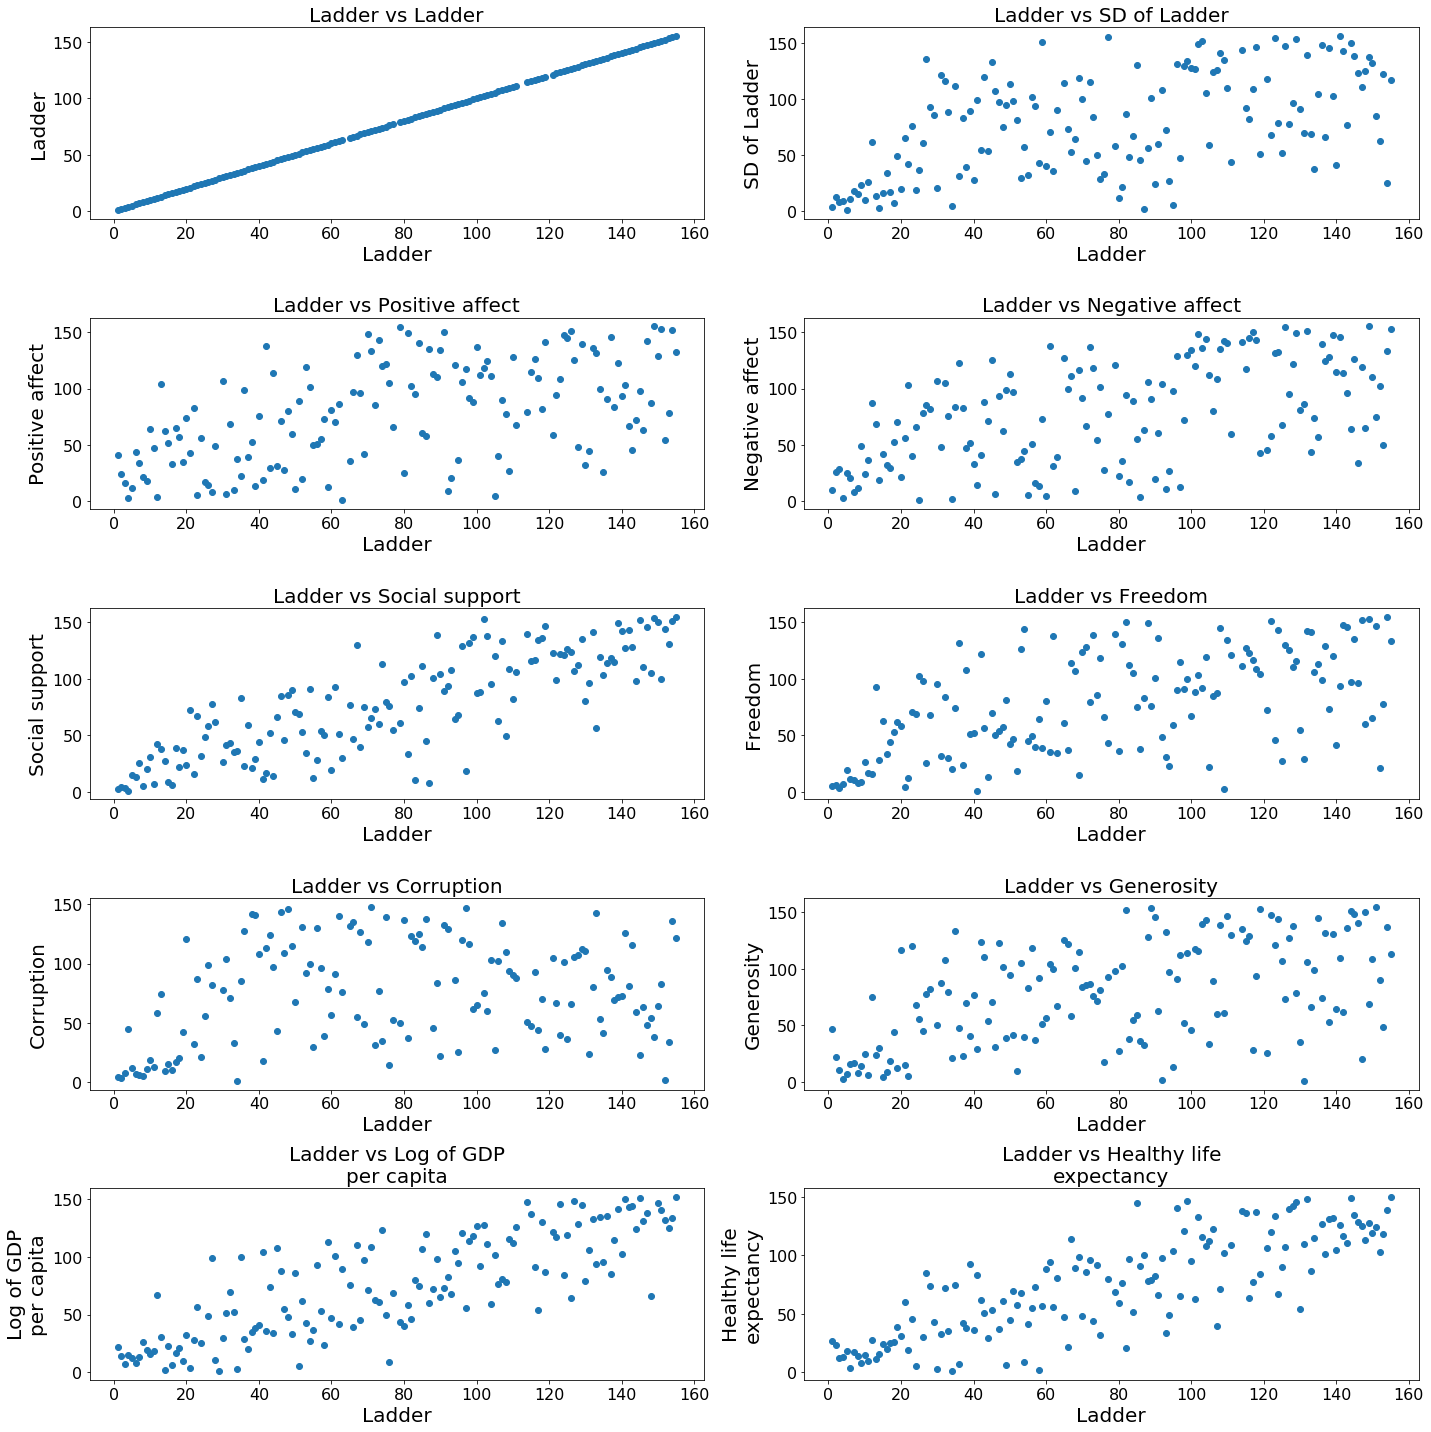

In [13]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20,20))
cols = [['Ladder','SD of Ladder'],['Positive affect','Negative affect'],['Social support','Freedom'],
 ['Corruption','Generosity'],['Log of GDP\nper capita','Healthy life\nexpectancy']]

for a, num in list(zip(axes, range(1, len(axes)+1))):
    for ax, nu in list(zip(a, range(1, len(axes[num-1])+1))):
        ax.scatter(x = happy_2019['Ladder'], y = happy_2019[cols[num-1][nu-1]])
        ax.set_xlabel('Ladder', fontsize =20)
        ax.tick_params(axis = 'both', labelsize = 16)
        ax.set_ylabel(f"{cols[num-1][nu-1]}", fontsize =20)
        ax.set_title(f"Ladder vs {cols[num-1][nu-1]}", fontsize = 20)
plt.tight_layout()

It seems that the Social Support, Log of GDP per capita and Healthy life expentancy is the feature that consistenly affecting the Ladder score. 
Social support is basically a social benefit that was provided by the country for the citizen (e.g. Free Healthcare, Free Education, etc.), this social benefit would be linked to the GDP of the country as it represent the power to buy and better social benefit would affect the health life expentancy. 

In [14]:
happy_2019.sort_values(by = 'Ladder')[['Region', 'Ladder']]

,Region,Ladder
5,Western Europe,1
2,Western Europe,2
3,Western Europe,3
1,Western Europe,4
6,Western Europe,5
...,...,...
128,Middle East and Northern Africa,151
145,Sub-Saharan Africa,152
137,Sub-Saharan Africa,153
144,Southern Asia,154


In [15]:
happy_2019.groupby('Region').count()['Ladder']

Region
Australia and New Zealand           2
Central and Eastern Europe         28
Eastern Asia                        6
Latin America and Caribbean        21
Middle East and Northern Africa    19
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 36
Western Europe                     20
Name: Ladder, dtype: int64

In [16]:
happy_2019[happy_2019['Region'] == 'Western Europe']

,Country,Region,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Switzerland,Western Europe,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
1,Iceland,Western Europe,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
2,Denmark,Western Europe,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
3,Norway,Western Europe,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
5,Finland,Western Europe,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
6,Netherlands,Western Europe,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
7,Sweden,Western Europe,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
12,Austria,Western Europe,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0
16,Luxembourg,Western Europe,14,3,62.0,19.0,27.0,28.0,9.0,30.0,2.0,16.0
17,Ireland,Western Europe,16,34,33.0,32.0,6.0,33.0,10.0,9.0,6.0,20.0


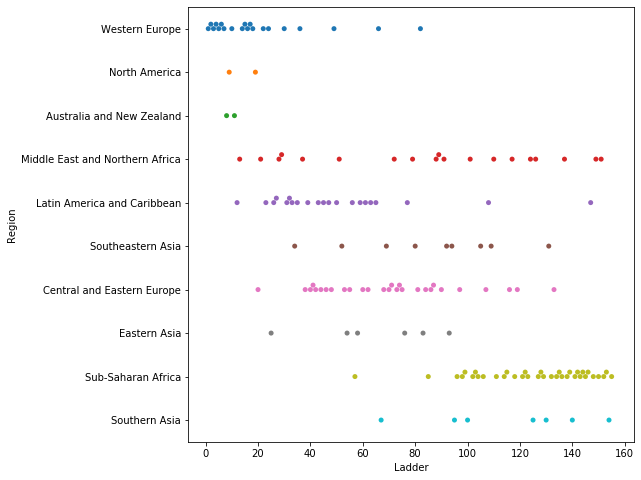

In [17]:
plt.figure(figsize = (8,8)) 
sns.swarmplot(data = happy_2019, x='Ladder', y='Region', orient = 'h')

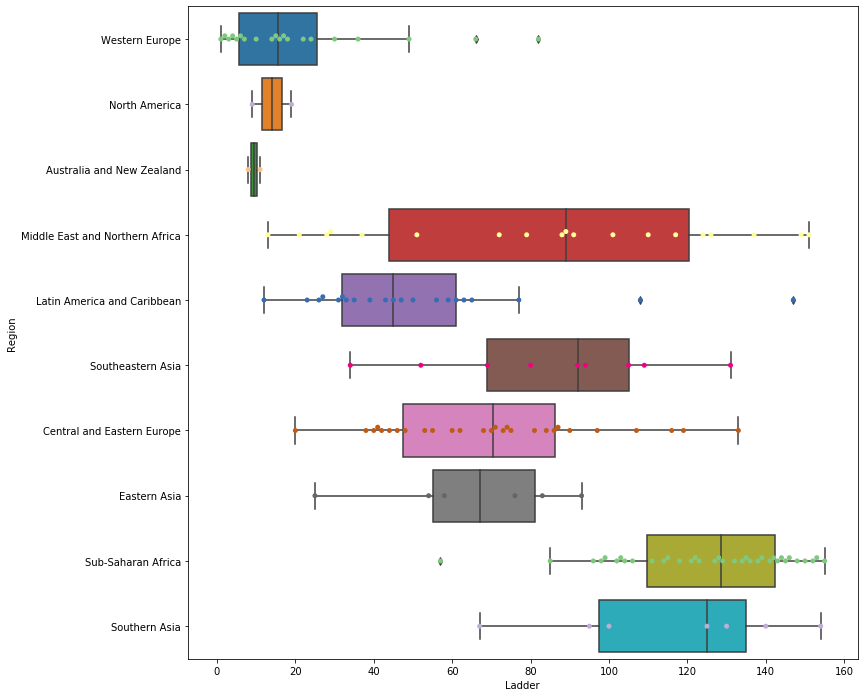

In [18]:
plt.figure(figsize=(12,12))

sns.boxplot(data=happy_2019, x='Ladder', y='Region')
sns.swarmplot(data=happy_2019, x='Ladder', y='Region', palette = 'Accent')

In [19]:
happy_2019[happy_2019['Region'] == 'Western Europe']['Ladder']

0      6
1      4
2      2
3      3
5      1
6      5
7      7
12    10
16    14
17    16
18    18
20    15
24    17
27    24
34    30
35    22
47    36
63    49
84    66
96    82
Name: Ladder, dtype: int64

In [20]:
happy_2019.head()

,Country,Region,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Switzerland,Western Europe,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
1,Iceland,Western Europe,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
2,Denmark,Western Europe,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
3,Norway,Western Europe,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
4,Canada,North America,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0


It seems that region could affecting the ladder value, or vice versa. Although, if we think logically the propable explanation is that the region is the one who affecting the ladder.

From our previous analysis, we also find that Social Support, Log of GDP per capita and Healthy life expentancy is affecting the ladder score. So, to back our insight we should see how these 3 features relationship with the region.

C:\Users\MSI\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\MSI\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


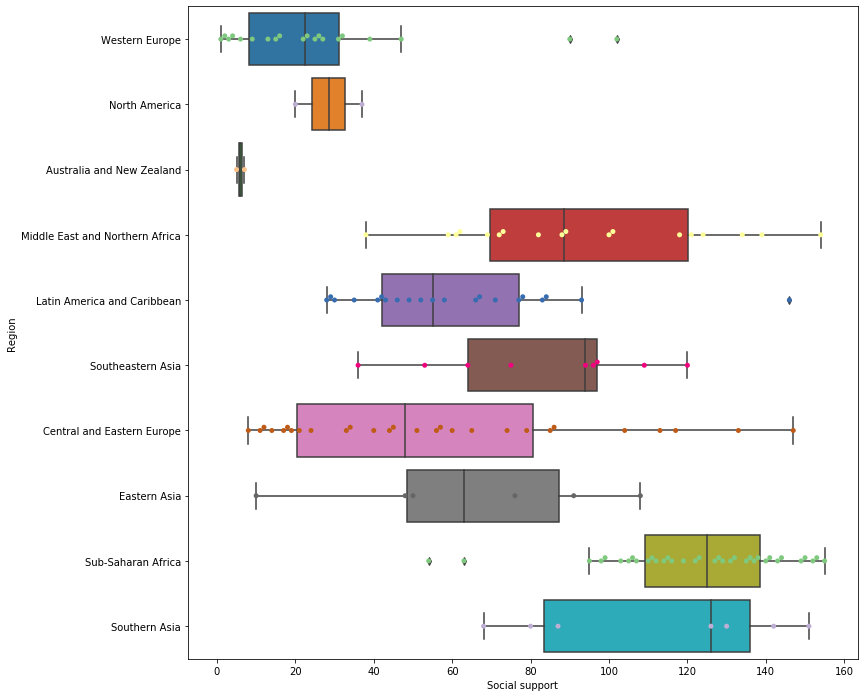

In [21]:
plt.figure(figsize=(12,12))

sns.boxplot(data=happy_2019, x='Social support', y='Region')
sns.swarmplot(data=happy_2019, x='Social support', y='Region', palette = 'Accent')

C:\Users\MSI\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\MSI\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


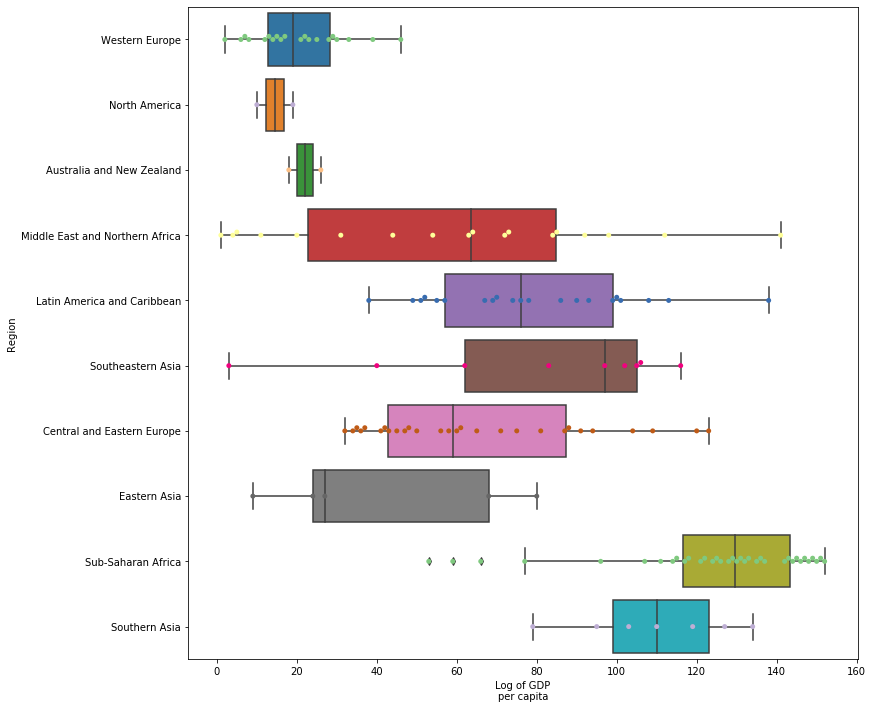

In [22]:
plt.figure(figsize=(12,12))

sns.boxplot(data=happy_2019, x='Log of GDP\nper capita', y='Region')
sns.swarmplot(data=happy_2019, x='Log of GDP\nper capita', y='Region', palette = 'Accent')

C:\Users\MSI\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\MSI\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


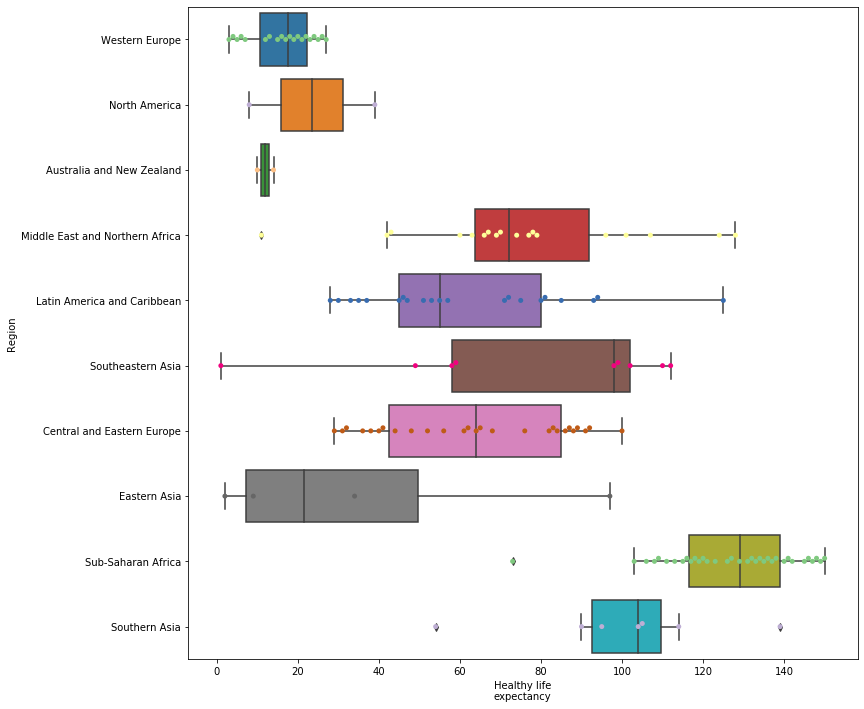

In [23]:
plt.figure(figsize=(12,12))

sns.boxplot(data=happy_2019, x='Healthy life\nexpectancy', y='Region')
sns.swarmplot(data=happy_2019, x='Healthy life\nexpectancy', y='Region', palette = 'Accent')

In [26]:
happy_2019[happy_2019['Country'] == 'Indonesia']

,Country,Region,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
70,Indonesia,Southeastern Asia,92,108,9.0,104.0,94.0,48.0,129.0,2.0,83.0,98.0


First of all, the number of the countries that represent the region are varied. Some region only represent by 2 countries and the other is represent by many countries. Although, it still interesting to see a similar pattern accross these chart such as countries in North America, Western Europe, and New Zealand is always represent the top of the ladder and Sub-Saharan Africa with Southern Asia is lurking at the bottom. 


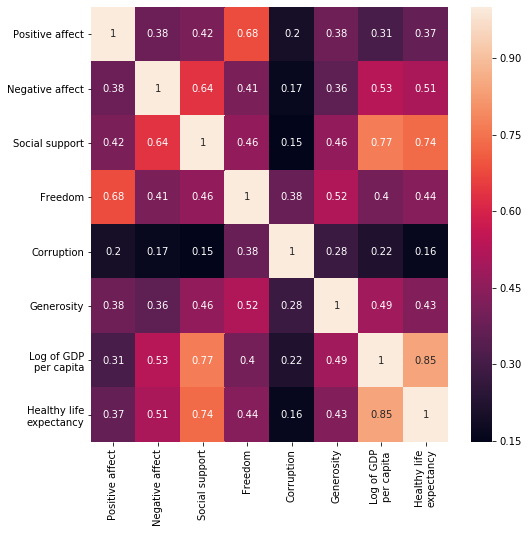

In [25]:
plt.figure(figsize = (8,8))
sns.heatmap(happy_2019.drop(['Ladder', 'SD of Ladder'], axis =1).corr(), annot = True)

As explained in the chart that affecting the ladder; Social Support, Log of GDP per capita, and Healthy life expentancy is affecting each other. 

Some other notable feature that affecting each other is like Freedom with Positive affect. Freedom is the measures the degree of civil liberties and political rights, or basically unhindered activities. It is not strange that with higher freedom, the positive affect would also be higher.

Similar as well to the Social support with the negative affect.